# Exercicio 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns
import pydot
from IPython.display import Image  
from io import StringIO
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Create dataset.
X = np.array([[1, 0, 3],
              [0, 1, 4],
              [0, 0, 5],
              [1, 1, 4],
              [0, 2, 2],
              [0, 1, 4],
              [1, 2, 2],
              [0, 1, 3],
              [0, 1, 4],
              [0, 1, 2],
              [1, 1, 2],
              [0, 0, 2],
              [0, 2, 3],
              [0, 0, 3],
              [1, 2, 3],
              [1, 0, 2],
              [1, 1, 3]])

y = np.array([[1],
              [1],
              [1],
              [1],
              [0],
              [1],
              [1],
              [0],
              [1],
              [0],
              [1],
              [1],
              [0],
              [1],
              [1],
              [0],
              [1,]])

In [3]:
# Split the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Set parameters for grid-search.
param_grid = [{'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 2, 5, 10, 15, 25], 'max_leaf_nodes': [None, 2, 5, 10, 15, 25, 50, 100]}]

# Instantiate DT class.
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(X, y)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s


{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': None}
0.7


[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    1.7s finished


In [5]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth = None, max_leaf_nodes = 25)

# Fit the classifier on the training features and labels.
dtc.fit(X_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = dtc.predict(X_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.8333333333333334


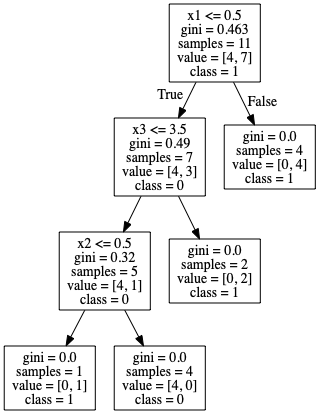

In [6]:
clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=18)

clf.fit(X_train, y_train)

# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, class_names=['0','1'], feature_names=['x1','x2', 'x3'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [7]:
x_train = np.array(['sim solteiro tres',
                    'nao casado quatro',
                    'nao solteiro cinco',
                    'sim casado quatro',
                    'nao divorciado dois',
                    'nao Casado quatro',
                    'sim divorciado dois',
                    'nao casado tres',
                    'nao casado quatro',
                    'nao casado dois',
                    'sim casado dois',
                    'nao solteiro dois',
                    'nao divorciado tres',
                    'nao solteiro tres',
                    'sim divorciado tres',
                    'nao solteiro dois',
                    'sim casado tres'])

y_train = np.array(['sim',
                    'sim',
                    'sim',
                    'sim',
                    'nao',
                    'sim', 
                    'sim', 
                    'nao', 
                    'sim', 
                    'nao', 
                    'sim', 
                    'sim', 
                    'nao', 
                    'sim', 
                    'sim', 
                    'nao', 
                    'sim'])

x_test = np.array(['nao casado tres'])

In [8]:
# Instantiate a CountVectorizer object.
vect = CountVectorizer()

In [9]:
# Fit and transform X_train into x_train_dtm (document-term matrices - dtm).
x_train_dtm = vect.fit_transform(x_train)

print(vect.get_feature_names())
print(x_train_dtm.toarray())

['casado', 'cinco', 'divorciado', 'dois', 'nao', 'quatro', 'sim', 'solteiro', 'tres']
[[0 0 0 0 0 0 1 1 1]
 [1 0 0 0 1 1 0 0 0]
 [0 1 0 0 1 0 0 1 0]
 [1 0 0 0 0 1 1 0 0]
 [0 0 1 1 1 0 0 0 0]
 [1 0 0 0 1 1 0 0 0]
 [0 0 1 1 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 1]
 [1 0 0 0 1 1 0 0 0]
 [1 0 0 1 1 0 0 0 0]
 [1 0 0 1 0 0 1 0 0]
 [0 0 0 1 1 0 0 1 0]
 [0 0 1 0 1 0 0 0 1]
 [0 0 0 0 1 0 0 1 1]
 [0 0 1 0 0 0 1 0 1]
 [0 0 0 1 1 0 0 1 0]
 [1 0 0 0 0 0 1 0 1]]


In [10]:
# Transform X_test into X_test_dtm.
x_test_dtm = vect.transform(x_test)

print(x_test_dtm.toarray())

[[1 0 0 0 1 0 0 0 1]]


In [11]:
# Instantiate a Multinomial Naive Bayes model.
model = MultinomialNB()

In [12]:
# train the model using X_train_dtm
model.fit(x_train_dtm, y_train)

MultinomialNB()

In [13]:
y_pred_class = model.predict(x_test_dtm)

In [14]:
print(y_pred_class)

['sim']


In [15]:
print(model.predict_proba(x_test_dtm))

[[0.37709029 0.62290971]]


## Resposta

Sim, autorizaria o empréstimo. De acordo com a predição realizada acima, a probabilidade de o Jair pagar o empréstimo é de aproximadamente 62%.